# Presentación

**Ciencia y Analítica de Datos**

Por:

*   **Víctor Alejandro Regueira Romero - A01794404**

Profesor asignado:

*   Roberto Antonio Guevara González

A 22 de octubre de 2022

---

# Bienvenido al notebook
# Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y Reconstrucción
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A1 = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [9]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposicion
values, vectors = eig(A)
print(values) #D
print(vectors) #W
print("-----------------------------")
#Ejemplo de reconstrucción

values, vectors = np.linalg.eig(A)

W = vectors
print("W")
print(W)
Winv = np.linalg.inv(W)
print("Winv")
print(Winv)
D = np.diag(values)
print("D")
print(D)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#TU CODIGO AQUI-------------------------------------
#Hay que considerar que se debe de hacer el producto punto de las matrices.
B = np.dot(np.dot(W,D),Winv) 
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -3.38433605e-16]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-----------------------------
W
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
Winv
[[-0.48295226 -0.59340999 -0.70386772]
 [-0.91788599 -0.24901003  0.41986593]
 [ 0.40824829 -0.81649658  0.40824829]]
D
[[ 1.61168440e+01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.11684397e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -3.38433605e-16]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


**La reconstruccion de B=W*D*Winv da como resultado la matriz A.**

### Función para realizar la **Descomposición** y **Reconstrucción**

In [10]:

def pca(X):
    #Imprimimos la matriz original
    print("-------Matriz original-------")
    print(X)
    print("-----------------------------")
    #Calculamos los valores y vectores eigen
    values, vectors = eig(X)
    #Definimos W, Winv y D
    W = vectors
    Winv = np.linalg.inv(W)
    D = np.diag(values)
    #Reconstruimos la matriz
    print("-------Matriz reconstruida-------")
    #Producto punto
    B = np.dot(np.dot(W,D),Winv)
    print(B.round(2))
    print("-----------------------------")
    return (X == B)

In [11]:
#Prueba
A = array([[1, 1, 1], [1, 1, 1],[1, 1, 1]])
pca(A)

-------Matriz original-------
[[1 1 1]
 [1 1 1]
 [1 1 1]]
-----------------------------
-------Matriz reconstruida-------
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
-----------------------------


array([[False, False,  True],
       [False, False, False],
       [ True, False, False]])

El resultado es similar entre la matriz original y la de construcción. Sin embargo, una está en otro tipo de variable, es por eso que reconoce algunos valores como desiguales

In [12]:
#Matriz 1
A1 = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
pca(A1)

-------Matriz original-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------
-------Matriz reconstruida-------
[[ 3.-0.j -0.-0.j  2.-0.j]
 [ 3.+0.j  0.+0.j -2.+0.j]
 [ 0.+0.j  1.+0.j  1.-0.j]]
-----------------------------


array([[False, False, False],
       [False, False, False],
       [False, False, False]])

In [13]:
#Matriz 2
A2 = array([[1,3,8], [2,0,0], [0,0,1]])
pca(A2)

-------Matriz original-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------
-------Matriz reconstruida-------
[[1. 3. 8.]
 [2. 0. 0.]
 [0. 0. 1.]]
-----------------------------


array([[False,  True, False],
       [ True,  True, False],
       [ True,  True,  True]])

In [14]:
#Matriz 3
A3 = array([[5,4,0], [1,0,1], [10,7,1]])
pca(A3)

-------Matriz original-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-----------------------------
-------Matriz reconstruida-------
[[ 5.  4.  0.]
 [ 1. -0.  1.]
 [10.  7.  1.]]
-----------------------------


array([[False, False, False],
       [False, False, False],
       [False, False, False]])

**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



# Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


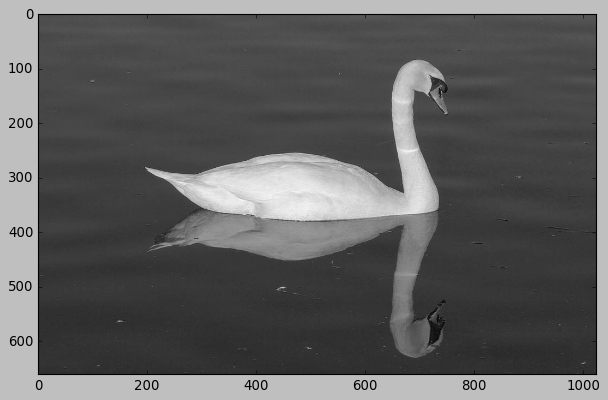

<PIL.Image.Image image mode=LA size=1024x660 at 0x20C9785D520>


In [15]:
from six.moves import urllib 
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic') # Configuración de gráfico "classic".
#Importando la imagen, la pone en escala de grises y la asigana a la variable img.
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg'))
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')

#Matriz con el valor de los pixeles de la imagen, en formato float
imgmat = np.array(list(imggray.getdata(band=0)),float) 

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(imggray)

In [16]:
U,D,V = np.linalg.svd(imgmat)
print(imgmat.shape)
print(U[:2])
print("---")
print(D[:2])
print("---")
print(V[:2])

(660, 1024)
[[-0.03593761 -0.03227204  0.06327023 ...  0.07276753  0.06971003
  -0.09143059]
 [-0.03596717 -0.03248687  0.06296996 ... -0.04498177 -0.03511139
   0.15735037]]
---
[66599.64354529 15354.73100072]
---
[[-0.02240187 -0.02246798 -0.02253651 ... -0.0228316  -0.02285465
  -0.02288675]
 [-0.03028157 -0.03033544 -0.03031803 ... -0.03080711 -0.03070707
  -0.03061059]]


In [17]:
U.shape

(660, 660)

In [18]:
V.shape

(1024, 1024)

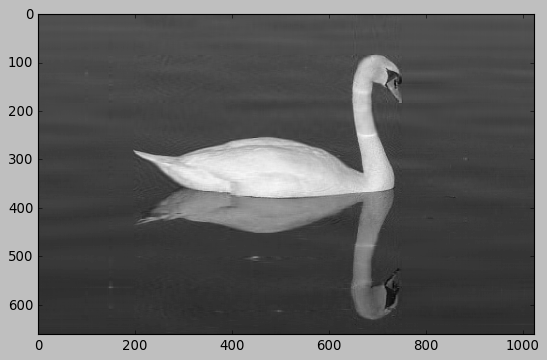

Felicidades la imagen está comprimida


In [19]:
#Cuantos valores crees que son necesarios
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue]) * np.diag(D[:nvalue]) * np.matrix(V[:nvalue,:])
#
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!
Comprime 3 imagenes

## Definiremos una función para poder comprimir las imágenes utilizando como parámetros la url de la imagen y qué tanto se va a comprimir 

In [20]:
def svg_img(url, com):
    plt.style.use('classic') # Configuración de gráfico "classic".
    #Importando la imagen  y la asignamos a la variable img
    img = Image.open(urllib.request.urlopen(url))
    #convertimos la imagen a tonalidades de grises
    imggray = img.convert('LA')

    #Matriz con el valor de los pixeles de la imagen, en formato float
    imgmat = np.array(list(imggray.getdata(band=0)),float) 
    imgmat.shape = (imggray.size[1],imggray.size[0])
    #Imprimimos la imagen original
    print(imggray, "\nImagen original...")
    plt.figure(figsize=(9,6))
    plt.imshow(imgmat,cmap='gray')
    plt.show()
    
    U,D,V = np.linalg.svd(imgmat)
    reconstimg = np.matrix(U[:,:com]) * np.diag(D[:com]) * np.matrix(V[:com,:])
    print("Imagen comprimida...")
    plt.figure(figsize=(9,6))
    plt.imshow(reconstimg,cmap='gray')
    plt.show()


<PIL.Image.Image image mode=LA size=640x335 at 0x20C98034DC0> 
Imagen original...


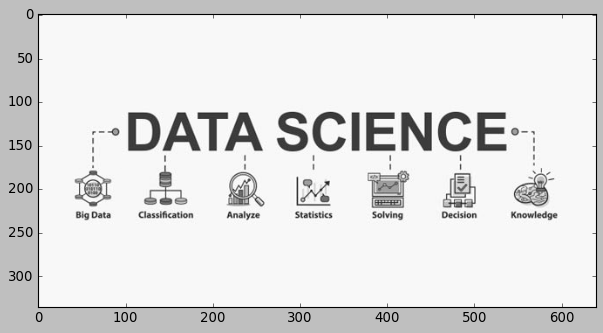

Imagen comprimida...


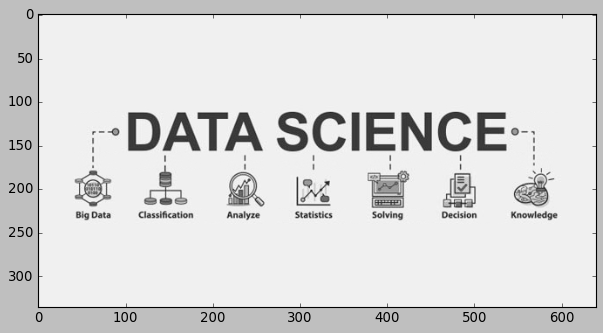

In [21]:
#imagen 1
svg_img('https://www.palermo.edu/Archivos_content/2021/negocios/julio/data/datascience-640.jpg', 100)

<PIL.Image.Image image mode=LA size=600x600 at 0x20C9EFD4970> 
Imagen original...


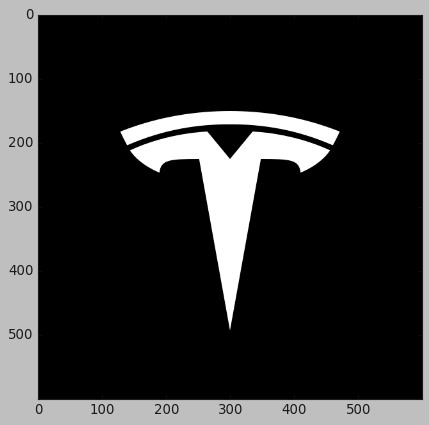

Imagen comprimida...


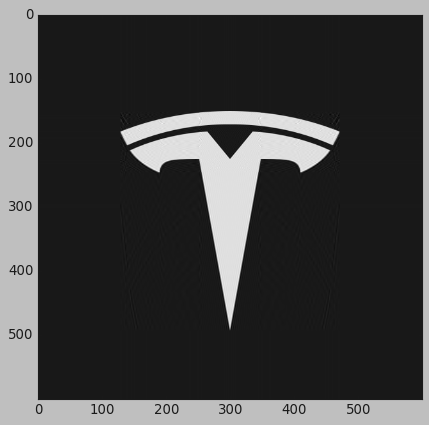

In [38]:
#imagen 2
svg_img('https://s3-symbol-logo.tradingview.com/tesla--600.png', 60)

<PIL.Image.Image image mode=LA size=1150x2044 at 0x20C97E51D90> 
Imagen original...


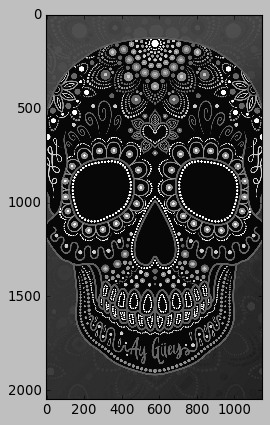

Imagen comprimida...


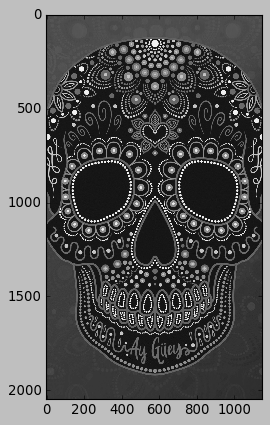

In [23]:
#imagen 3
svg_img('https://cdn.shopify.com/s/files/1/0809/3349/files/Carcasas_2020_Calafrac.jpg', 500)

# Ejercicio 3

**Feature importances o importancia de las variables o características.**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e


Danos tus comentarios acerca de lo más relevante del ejercicio y que descubriste de las variables análizadas. Adjunta tu notebook y el link. 

In [24]:
#tu codigo aqui
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')# Load the data
iris = datasets.load_iris()
X = iris.data
y = iris.target# Z-score the features
#Aquí se estandarizan los valores utilizando la función StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

Voy a convertir la lista de datos que tenemos en un DataFrame para poder ver cómo se comporta el PCA.

In [25]:
df_X = pd.DataFrame(X)
df_X

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


Aquí tenemos nuestro DataFrame con todos los features

In [26]:
df_pca = pd.DataFrame(pca.components_.T)
pcs_labels = [f'PC{i + 1}' for i in range(len(df_pca.columns))] 
df_pca.columns = pcs_labels
df_pca

,PC1,PC2
0,0.521066,0.377418
1,-0.269347,0.923296
2,0.580413,0.024492
3,0.564857,0.066942


Estos son los valores para cada feature y los dos compoentes principales

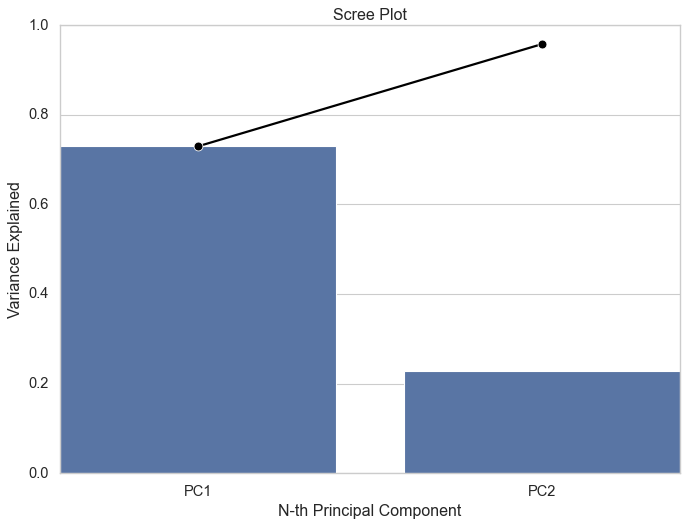

In [27]:
import seaborn as sns
PC_components = np.arange(len(pcs_labels))
#PC_components

#La configuración del fondo y tamaño de texto del gráfico
sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7)) #área de gráfico total

#Gráfico de barras
sns.barplot(x = pcs_labels, 
                y = pca.explained_variance_ratio_, 
                color = 'b'
                )

#Gráfico de línea
sns.lineplot(x = PC_components, 
                 y = np.cumsum(pca.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )
#Titulos
plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

En el gráfico podemos observar cómo hay una mayor concentrción de varianza en el componente 1 (PC1)

In [28]:
pcsSummary_df = pd.DataFrame({
'% varianza explicada': np.round(pca.explained_variance_ratio_,4) * 100,
'% varianza acumulada': np.cumsum(pca.explained_variance_ratio_) * 100
},
index = pcs_labels)
pcsSummary_df

,% varianza explicada,% varianza acumulada
PC1,72.96,72.962445
PC2,22.85,95.813207


Usando dos componentes ya tenemos el 95% de la varianza total.

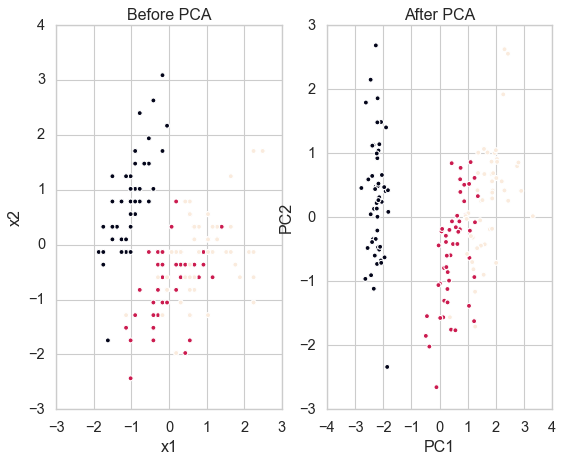

In [29]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

Distribución de las variables y componentes principales.

In [30]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [31]:
np.cov(X_new.T)

array([[2.93808505e+00, 4.94094157e-17],
       [4.94094157e-17, 9.20164904e-01]])

In [32]:
pca.explained_variance_

array([2.93808505, 0.9201649 ])

In [33]:
print(abs( pca.components_ ))

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


Siempre usaremos los valores absolutos para determinar la importancia de cada uno de los componentes

In [34]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
    '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

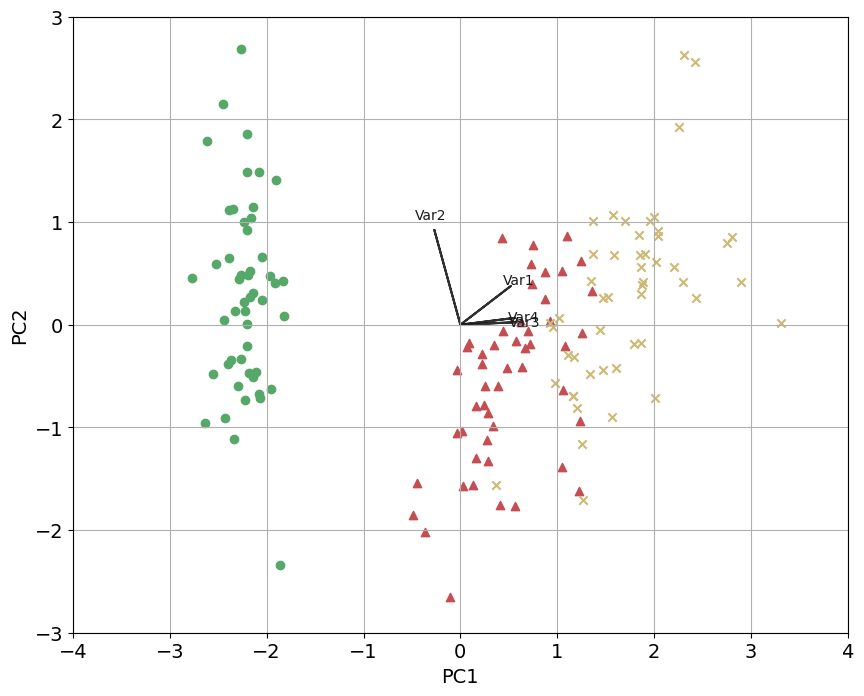

In [35]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

In [36]:
# Var 3 and Var 4 are extremely positively correlated
print(np.corrcoef(X[:,2], X[:,3])[1,0])
# Var 2and Var 3 are negatively correlated
print(np.corrcoef(X[:,1], X[:,2])[1,0])

0.9628654314027957
-0.42844010433054014


### Preguntas

**¿Qué es feature importance y para que nos sirve?**

>Es la magnitud de los valores valores correspondientes a los eigenvectors. Mientras mayor magnitud tenga, más importante es.
>Podemos identificar que features tienen más importancia para cada componente principal encontrado (PC). De esta forma, escogeríamos los features que aporten un mayor valor de varianza hacia nuestros componentes principales.

**¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?**
>Durante el análsis tuvimos como muestra 4 features que satisfacen a una salida. Lo que hicimos fue reducir la dimensionalidad de estos features de 4 a 2. Para esto utilizamos el PCA, especificando que buscábamos tener únicamente dos componentes principales.
>Identificamos que con 2 PC, teníamos el 95% de la varianza acumulada, por lo tanto, es suficiente porcentaje para concluir que podemos trabajr con sólamente dos feaures.

>De igual manera, identificamos la importancia de los feature, para determinar cuáles de esos 4 features tenían un mayor impacto en la varianza de los valores, ,siendo el feature 1 para el PC1 y feature 2 para el PC2, debido a que son los valores absolutos más largos para cada componente principal.

**¿Dónde lo aplicarías o te sería de utilidad este conocimiento?**

>Método no supervisado para la reducción de la dimensionalidad de los datos. Lo aplicaría para reducir la dimensionalidad para un conjunto de datos que contenga un gran número de features.

Es importante la reducción de dimensiones debido a que nos puede ayudar en varios casos como:
* Aumentar la velocidad de entrenamiento de los modelos.
* Reducimos la cantidad de información a usar.
* Se aprecian mejores los gráficos de visualización de datos (3D - 2D)

